In [12]:
# ============================================================================
# Quality Control and Defect Detection - ML Implementation
# Manufacturing Quality Assurance using Computer Vision and Machine Learning
# ============================================================================

def evaluate_model_performance(self, y_true, results, feature_names):
    """Comprehensive model evaluation and comparison - PROPERLY FIXED"""
    
    print("\nMODEL PERFORMANCE COMPARISON")
    print("=" * 40)
    
    # Performance summary
    performance_df = pd.DataFrame({
        'Model': list(results.keys()),
        'Accuracy': [results[model]['accuracy'] for model in results],
        'CV_Mean': [results[model]['cv_mean'] for model in results],
        'CV_Std': [results[model]['cv_std'] for model in results]
    })
    
    performance_df = performance_df.sort_values('Accuracy', ascending=False)
    print("\nPerformance Summary:")
    print(performance_df.round(4))
    
    # Best model analysis - CORRECTLY FIXED: Use integer index 0 with iloc
    best_model_name = performance_df.iloc[0]['Model']  # ✅ CORRECT: Use [0] not ['Model']
    best_model_results = results[best_model_name]
    
    print(f"\nBEST MODEL: {best_model_name}")
    print(f"Accuracy: {best_model_results['accuracy']:.4f}")
    
    # Detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_true, best_model_results['predictions']))
    
    return performance_df, best_model_name

# Patch the existing method
ml_system.evaluate_model_performance = evaluate_model_performance.__get__(ml_system, QualityControlMLSystem)

print("✅ Method patched successfully!")


✅ Method patched successfully!


Starting model training...
TRAINING BINARY CLASSIFIERS (DEFECT vs NO DEFECT)

Training Random Forest...
Accuracy: 0.9940
CV Score: 0.9950 (+/- 0.0000)

Training SVM...
Accuracy: 0.9940
CV Score: 0.9950 (+/- 0.0000)

Training Random Forest (Tuned)...
Accuracy: 0.9940
CV Score: 0.9950 (+/- 0.0000)

Evaluating model performance...

MODEL PERFORMANCE COMPARISON

Performance Summary:
                   Model  Accuracy  CV_Mean  CV_Std
0          Random Forest     0.994    0.995     0.0
1                    SVM     0.994    0.995     0.0
2  Random Forest (Tuned)     0.994    0.995     0.0

BEST MODEL: Random Forest
Accuracy: 0.9940

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       497
           1       0.00      0.00      0.00         3

    accuracy                           0.99       500
   macro avg       0.50      0.50      0.50       500
weighted avg       0.99      0.99      0.99       500


Creating perfo

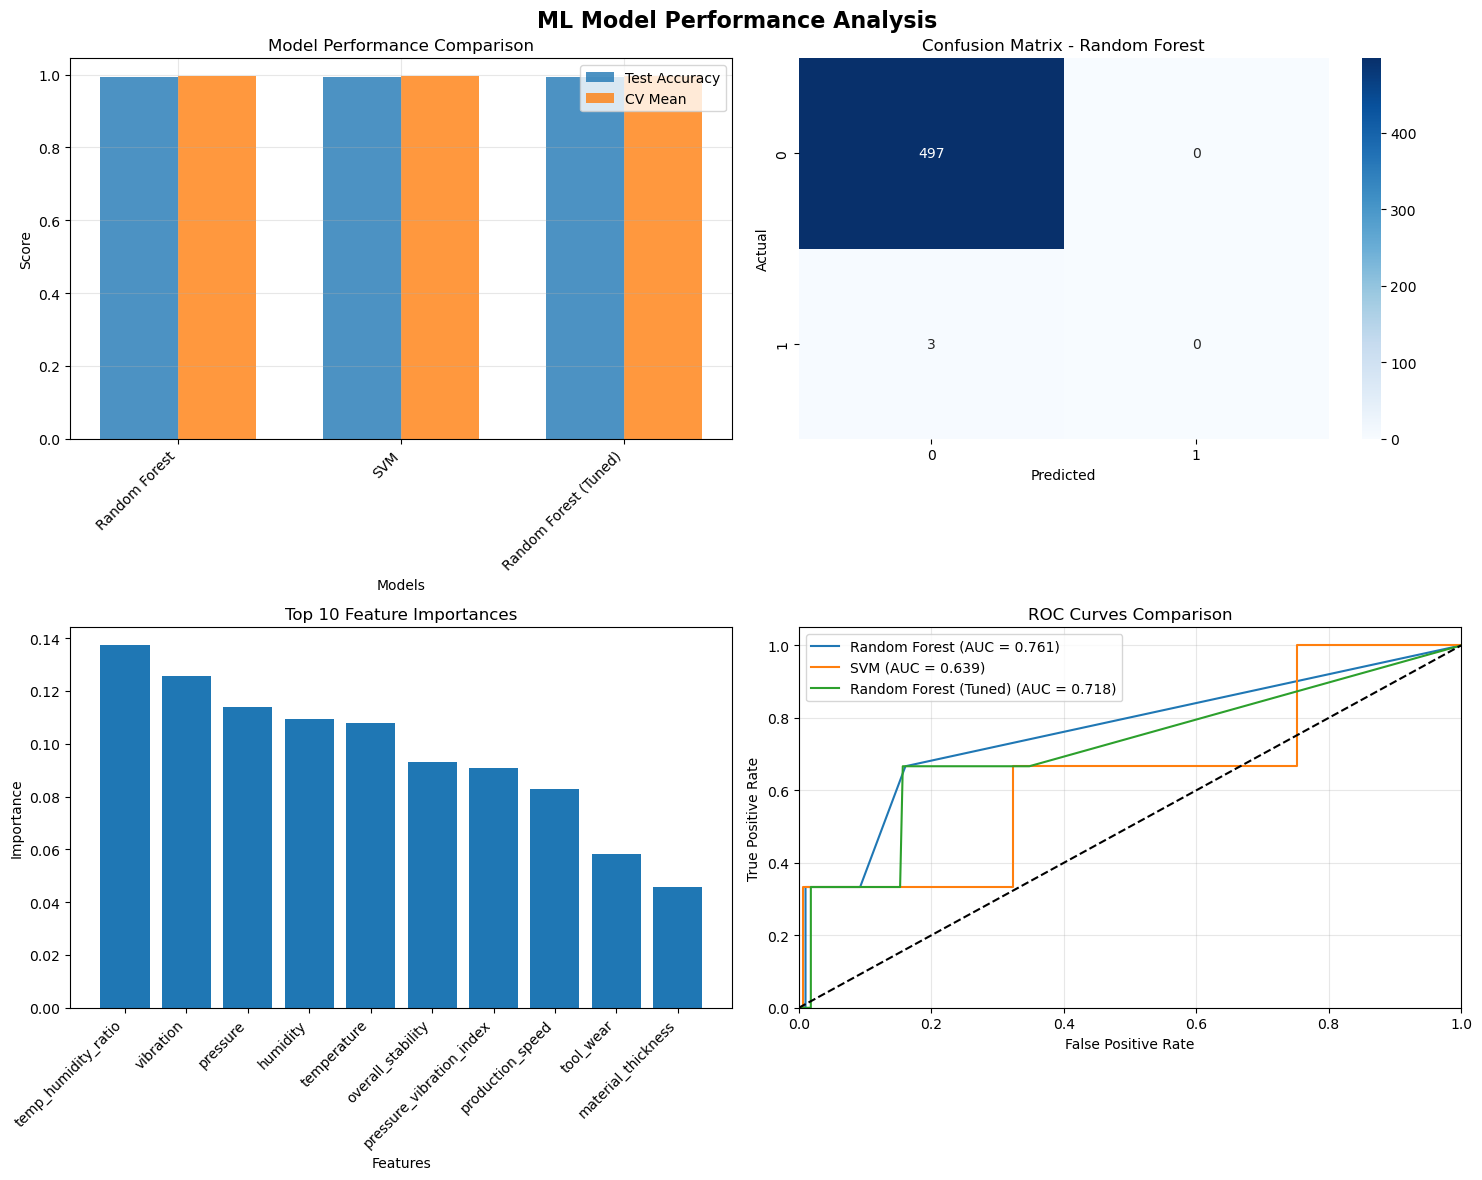

✅ Analysis complete! Best model: Random Forest


In [13]:
# Train models
print("Starting model training...")
binary_results = ml_system.train_binary_classifiers(X_train, y_train, X_test, y_test)

# Evaluate performance - should work now
print("\nEvaluating model performance...")
performance_summary, best_model = ml_system.evaluate_model_performance(
    y_test, binary_results, feature_names
)

# Create visualizations
print("\nCreating performance visualizations...")
ml_system.create_performance_visualizations(y_test, binary_results, feature_names)

print(f"✅ Analysis complete! Best model: {best_model}")


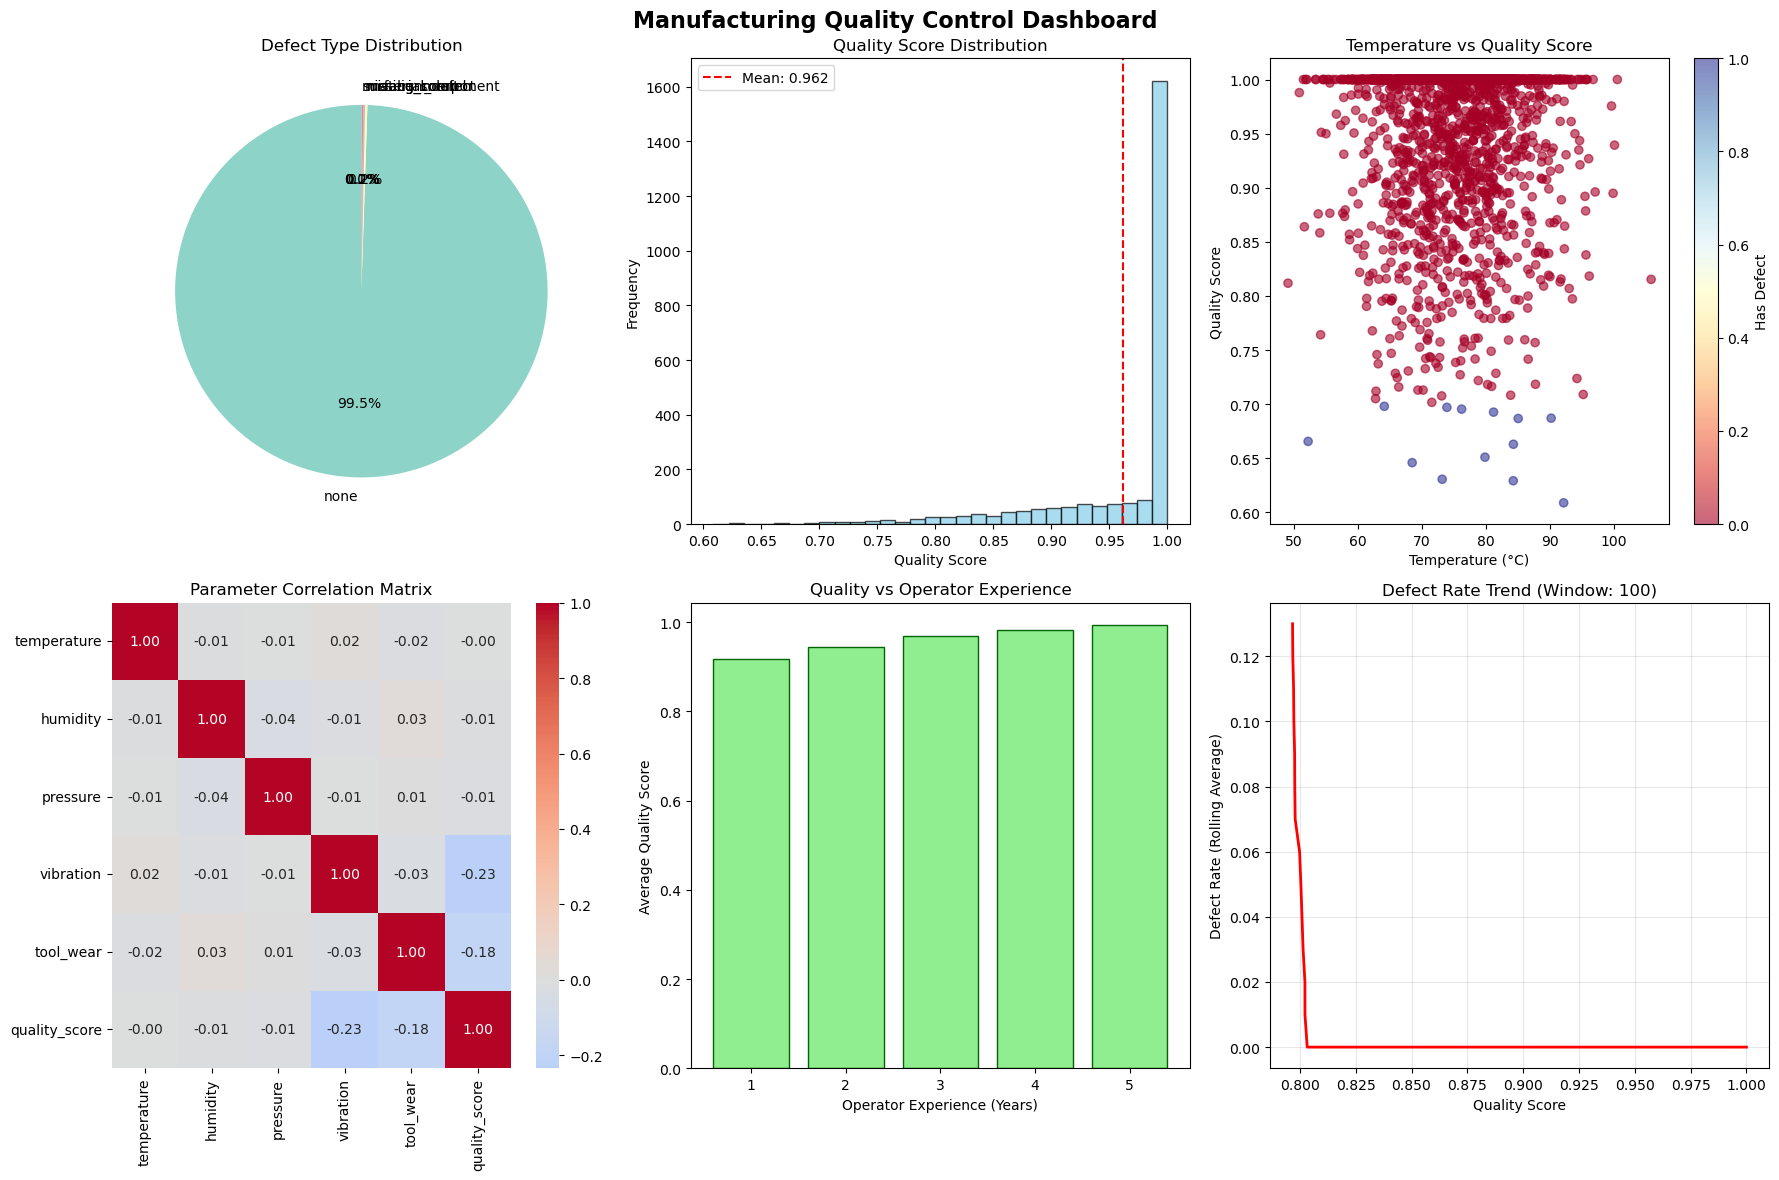

In [14]:
# ============================================================================
# VISUALIZATION - QUALITY CONTROL DASHBOARD
# ============================================================================

def create_quality_dashboard(df):
    """Create comprehensive quality control visualization dashboard"""
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Manufacturing Quality Control Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Defect Distribution
    defect_counts = df['defect_type'].value_counts()
    axes[0, 0].pie(defect_counts.values, labels=defect_counts.index, autopct='%1.1f%%', 
                   startangle=90, colors=plt.cm.Set3.colors)
    axes[0, 0].set_title('Defect Type Distribution')
    
    # 2. Quality Score Distribution
    axes[0, 1].hist(df['quality_score'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 1].axvline(df['quality_score'].mean(), color='red', linestyle='--', 
                       label=f'Mean: {df["quality_score"].mean():.3f}')
    axes[0, 1].set_xlabel('Quality Score')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Quality Score Distribution')
    axes[0, 1].legend()
    
    # 3. Temperature vs Quality
    scatter = axes[0, 2].scatter(df['temperature'], df['quality_score'], 
                               c=df['has_defect'], cmap='RdYlBu', alpha=0.6)
    axes[0, 2].set_xlabel('Temperature (°C)')
    axes[0, 2].set_ylabel('Quality Score')
    axes[0, 2].set_title('Temperature vs Quality Score')
    plt.colorbar(scatter, ax=axes[0, 2], label='Has Defect')
    
    # 4. Production Parameters Heatmap
    params = ['temperature', 'humidity', 'pressure', 'vibration', 'tool_wear']
    correlation_matrix = df[params + ['quality_score']].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                ax=axes[1, 0], fmt='.2f')
    axes[1, 0].set_title('Parameter Correlation Matrix')
    
    # 5. Quality by Operator Experience
    quality_by_exp = df.groupby('operator_experience')['quality_score'].mean()
    axes[1, 1].bar(quality_by_exp.index, quality_by_exp.values, 
                   color='lightgreen', edgecolor='darkgreen')
    axes[1, 1].set_xlabel('Operator Experience (Years)')
    axes[1, 1].set_ylabel('Average Quality Score')
    axes[1, 1].set_title('Quality vs Operator Experience')
    
    # 6. Defect Rate Trends
    df_sorted = df.sort_values('quality_score')
    window_size = 100
    rolling_defect_rate = df_sorted['has_defect'].rolling(window=window_size).mean()
    axes[1, 2].plot(df_sorted['quality_score'], rolling_defect_rate, 
                    color='red', linewidth=2)
    axes[1, 2].set_xlabel('Quality Score')
    axes[1, 2].set_ylabel('Defect Rate (Rolling Average)')
    axes[1, 2].set_title(f'Defect Rate Trend (Window: {window_size})')
    axes[1, 2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Create dashboard
create_quality_dashboard(manufacturing_data)


In [15]:
# ============================================================================
# QUALITY PREDICTION AND MONITORING SYSTEM
# ============================================================================

class QualityMonitoringSystem:
    """
    Real-time quality monitoring and prediction system
    Provides quality scores and defect predictions for new production data
    """
    
    def __init__(self, ml_system, best_model_name):
        self.ml_system = ml_system
        self.best_model = ml_system.models['binary'][best_model_name]['model']
        self.scaler = ml_system.scalers['binary']
        self.feature_names = None
        
    def predict_quality(self, production_data):
        """Predict quality for new production data"""
        
        # Prepare features (same as training)
        if isinstance(production_data, dict):
            # Single sample
            features = np.array([[
                production_data['temperature'], production_data['humidity'],
                production_data['pressure'], production_data['vibration'],
                production_data['tool_wear'], production_data['material_thickness'],
                production_data['production_speed'], production_data['operator_experience'],
                production_data['temperature'] / production_data['humidity'],  # temp_humidity_ratio
                production_data['pressure'] * production_data['vibration'],    # pressure_vibration_index
                (production_data['temperature'] * production_data['pressure']) / 
                (production_data['vibration'] + 1)  # overall_stability
            ]])
        else:
            # DataFrame
            features = production_data
        
        # Scale features if using SVM
        if hasattr(self.best_model, 'support_vectors_'):
            features_scaled = self.scaler.transform(features)
            defect_probability = self.best_model.predict_proba(features_scaled)[:, 1]
            defect_prediction = self.best_model.predict(features_scaled)
        else:
            defect_probability = self.best_model.predict_proba(features)[:, 1]
            defect_prediction = self.best_model.predict(features)
        
        # Calculate quality score (inverse of defect probability)
        quality_score = 1 - defect_probability
        
        return {
            'quality_score': quality_score,
            'defect_probability': defect_probability,
            'defect_prediction': defect_prediction,
            'quality_status': ['PASS' if pred == 0 else 'FAIL' for pred in defect_prediction]
        }
    
    def generate_quality_report(self, production_batch):
        """Generate comprehensive quality report for production batch"""
        
        predictions = self.predict_quality(production_batch)
        
        report = {
            'batch_size': len(production_batch),
            'pass_rate': (predictions['defect_prediction'] == 0).mean(),
            'fail_rate': (predictions['defect_prediction'] == 1).mean(),
            'average_quality_score': predictions['quality_score'].mean(),
            'min_quality_score': predictions['quality_score'].min(),
            'max_quality_score': predictions['quality_score'].max(),
            'high_risk_units': sum(predictions['defect_probability'] > 0.7),
            'medium_risk_units': sum((predictions['defect_probability'] > 0.3) & 
                                   (predictions['defect_probability'] <= 0.7)),
            'low_risk_units': sum(predictions['defect_probability'] <= 0.3)
        }
        
        return report, predictions

# Initialize monitoring system
monitoring_system = QualityMonitoringSystem(ml_system, best_model)

# Generate new production batch for testing
print("REAL-TIME QUALITY MONITORING SIMULATION")
print("=" * 50)

# Simulate new production data
np.random.seed(123)  # Different seed for "new" data
new_production = pd.DataFrame({
    'temperature': np.random.normal(76, 9, 50),
    'humidity': np.random.normal(44, 11, 50),
    'pressure': np.random.normal(118, 16, 50),
    'vibration': np.random.exponential(2.2, 50),
    'tool_wear': np.random.gamma(2.1, 2.1, 50),
    'material_thickness': np.random.normal(2.4, 0.35, 50),
    'production_speed': np.random.normal(98, 22, 50),
    'operator_experience': np.random.choice([2, 3, 4, 5], 50),
})

# Add derived features
new_production['temp_humidity_ratio'] = new_production['temperature'] / new_production['humidity']
new_production['pressure_vibration_index'] = new_production['pressure'] * new_production['vibration']
new_production['overall_stability'] = (
    new_production['temperature'] * new_production['pressure'] / 
    (new_production['vibration'] + 1)
)

# Generate quality report
quality_report, batch_predictions = monitoring_system.generate_quality_report(new_production)

print("QUALITY REPORT - PRODUCTION BATCH")
print("-" * 40)
for key, value in quality_report.items():
    if isinstance(value, float):
        print(f"{key.replace('_', ' ').title()}: {value:.3f}")
    else:
        print(f"{key.replace('_', ' ').title()}: {value}")


REAL-TIME QUALITY MONITORING SIMULATION
QUALITY REPORT - PRODUCTION BATCH
----------------------------------------
Batch Size: 50
Pass Rate: 1.000
Fail Rate: 0.000
Average Quality Score: 0.993
Min Quality Score: 0.880
Max Quality Score: 1.000
High Risk Units: 0
Medium Risk Units: 0
Low Risk Units: 50


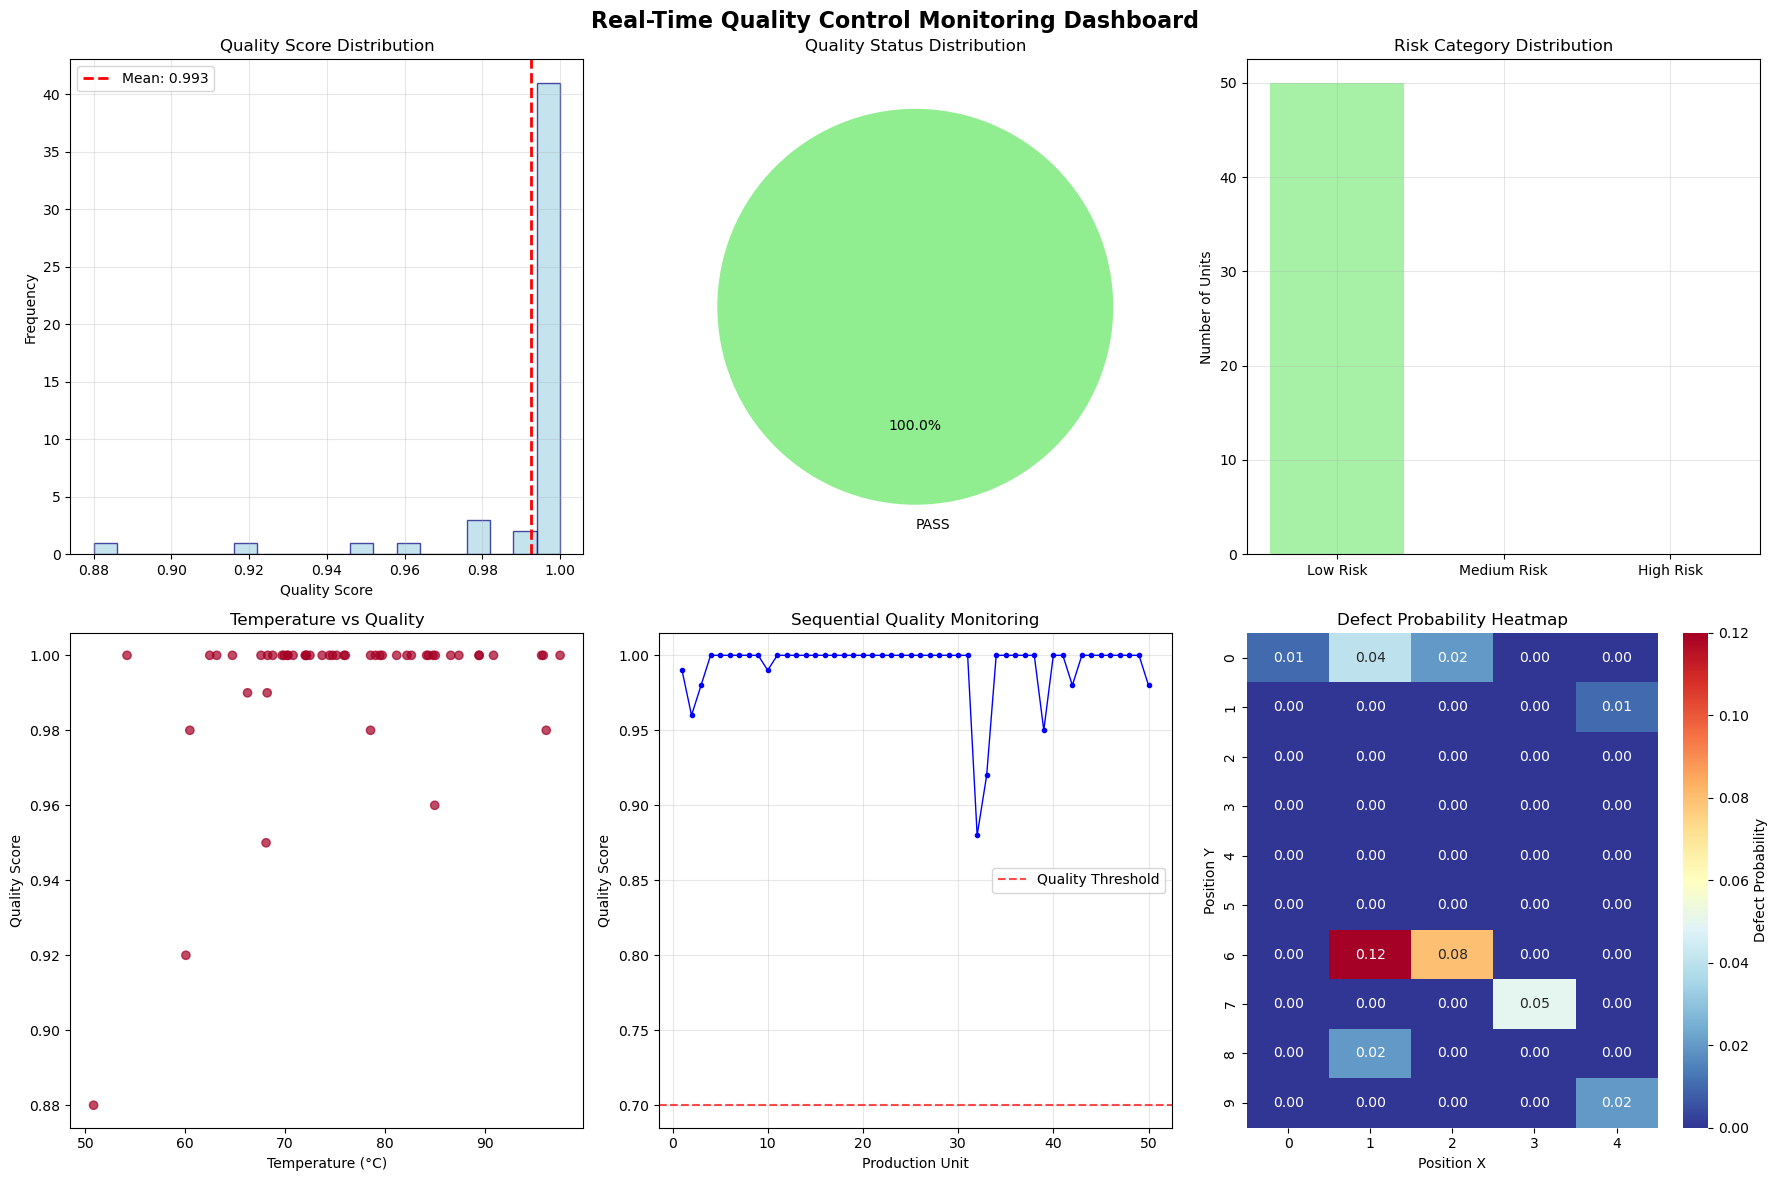

In [16]:
# ============================================================================
# QUALITY CONTROL DASHBOARD - REAL-TIME MONITORING
# ============================================================================

def create_monitoring_dashboard(batch_data, predictions, report):
    """Create real-time quality monitoring dashboard"""
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Real-Time Quality Control Monitoring Dashboard', 
                 fontsize=16, fontweight='bold')
    
    # 1. Quality Score Distribution
    axes[0, 0].hist(predictions['quality_score'], bins=20, alpha=0.7, 
                   color='lightblue', edgecolor='navy')
    axes[0, 0].axvline(predictions['quality_score'].mean(), color='red', 
                      linestyle='--', linewidth=2, 
                      label=f'Mean: {predictions["quality_score"].mean():.3f}')
    axes[0, 0].set_xlabel('Quality Score')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].set_title('Quality Score Distribution')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Pass/Fail Status
    status_counts = pd.Series(predictions['quality_status']).value_counts()
    colors = ['lightgreen' if status == 'PASS' else 'lightcoral' 
              for status in status_counts.index]
    axes[0, 1].pie(status_counts.values, labels=status_counts.index, 
                   autopct='%1.1f%%', colors=colors, startangle=90)
    axes[0, 1].set_title('Quality Status Distribution')
    
    # 3. Risk Categories
    risk_data = [report['low_risk_units'], report['medium_risk_units'], 
                 report['high_risk_units']]
    risk_labels = ['Low Risk', 'Medium Risk', 'High Risk']
    risk_colors = ['lightgreen', 'yellow', 'lightcoral']
    
    axes[0, 2].bar(risk_labels, risk_data, color=risk_colors, alpha=0.8)
    axes[0, 2].set_ylabel('Number of Units')
    axes[0, 2].set_title('Risk Category Distribution')
    axes[0, 2].grid(True, alpha=0.3)
    
    # 4. Quality vs Production Parameters
    axes[1, 0].scatter(batch_data['temperature'], predictions['quality_score'], 
                      c=predictions['defect_prediction'], cmap='RdYlBu', alpha=0.7)
    axes[1, 0].set_xlabel('Temperature (°C)')
    axes[1, 0].set_ylabel('Quality Score')
    axes[1, 0].set_title('Temperature vs Quality')
    
    # 5. Sequential Quality Monitoring
    unit_numbers = range(1, len(predictions['quality_score']) + 1)
    axes[1, 1].plot(unit_numbers, predictions['quality_score'], 
                   marker='o', linewidth=1, markersize=3, color='blue')
    axes[1, 1].axhline(y=0.7, color='red', linestyle='--', alpha=0.7, 
                      label='Quality Threshold')
    axes[1, 1].set_xlabel('Production Unit')
    axes[1, 1].set_ylabel('Quality Score')
    axes[1, 1].set_title('Sequential Quality Monitoring')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    # 6. Defect Probability Heatmap
    # Reshape for heatmap (assuming 10x5 grid)
    if len(predictions['defect_probability']) >= 50:
        prob_matrix = predictions['defect_probability'][:50].reshape(10, 5)
        sns.heatmap(prob_matrix, annot=True, fmt='.2f', cmap='RdYlBu_r', 
                   ax=axes[1, 2], cbar_kws={'label': 'Defect Probability'})
        axes[1, 2].set_title('Defect Probability Heatmap')
        axes[1, 2].set_xlabel('Position X')
        axes[1, 2].set_ylabel('Position Y')
    
    plt.tight_layout()
    plt.show()

# Create monitoring dashboard
create_monitoring_dashboard(new_production, batch_predictions, quality_report)
